# Play with Bezier Curves
and maybe find some new ways to encode multidimensional data in them 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#start and end points of curves
origins = [[1,0],[-0.5,sp.sqrt(3)/2], [-0.5,-sp.sqrt(3)/2]]
destinations = [[0,0],[0,0],[0,0]]

origins = [[1,0],[2,0],[5,0]]
destinations = [[0,0],[0,0],[1,0]]

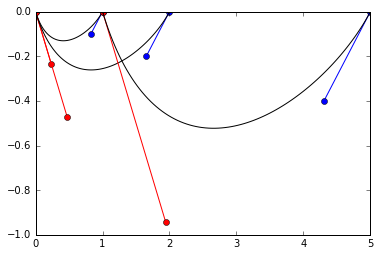

In [3]:
#### Inputs

#A list of P0's and P3's. Must be the same length

#The angle the control point will make with the green line
blue_angle = sp.pi/6
red_angle = sp.pi/4

#And the lengths of the lines (as a fraction of the length of the green one)
blue_len = 1./5
red_len = 1./3

### Workings

#Generate the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hold(True)

#Setup the parameterisation
t = sp.linspace(0,1,100)

for i in xrange(len(origins)):
#Read in the origin & destination points
    POx,POy = origins[i][0], origins[i][1]
    P3x,P3y = destinations[i][0], destinations[i][1]

#Add those to the axes
    ax.plot(POx,POy, 'ob')
    ax.plot(P3x,P3y, 'or')
    ax.plot((POx,P3x),(POy,P3y), 'g')

    #Work out r and theta (as if based at P3)
    r = ((POx-P3x)**2 + (POy-P3y)**2)**0.5
    theta = sp.arctan2((POy-P3y),(POx-P3x))

    #Find the relevant angles for the control points
    aO =theta + blue_angle+ sp.pi
    aD = theta - red_angle

    #Work out the control points
    P1x, P1y = POx+ blue_len*r*sp.cos(aO), POy + blue_len*r*sp.sin(aO)
    P2x, P2y = P3x+ red_len*r*sp.cos(aD), P3y + red_len*r*sp.sin(aD)

    #Plot the control points and their vectors
    ax.plot((P3x,P2x),(P3y,P2y), 'r')
    ax.plot((POx,P1x),(POy,P1y), 'b')
    ax.plot(P1x, P1y, 'ob')
    ax.plot(P2x, P2y, 'or')

    #Use the Bezier formula
    Bx = (1-t)**3*POx + 3*(1-t)**2*t*P1x + 3*(1-t)*t**2*P2x + t**3*P3x
    By = (1-t)**3*POy + 3*(1-t)**2*t*P1y + 3*(1-t)*t**2*P2y + t**3*P3y

    #Plot the Bezier curve
    ax.plot(Bx, By, 'k')


In [4]:
origins = [[1,0],[2,0],[3,0]]
destinations = [[0,0],[0,0],[1,0]]

#origins = [[1,0]]
#destinations = [[0,0]]

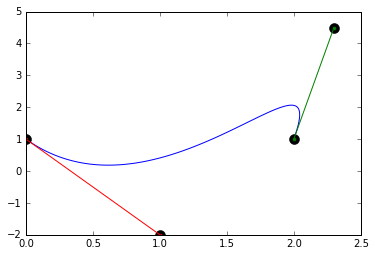

In [5]:
Px=[0,1,2.3,2]
Py=[1,-2,4.5,1]

Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

plt.plot(Bx, By, 'b')

for i in range(len(Px)):
    plt.plot(Px[i],Py[i],'ko-',markersize=10)

plt.plot(Px[0:2],Py[0:2],'r.-')
plt.plot(Px[2::],Py[2::],'g.-')

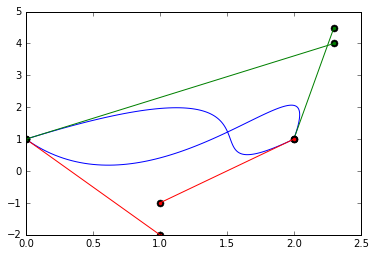

In [7]:
#two curves with the same start and end points
#i.e. 4 control points to carry information

Pxs=[[0,1,2.3,2],[2,1,2.3,0]]
Pys=[[1,-2,4.5,1],[1,-1,4.0,1]]

for k in range(len(Pxs)):
    Px=Pxs[k]
    Py=Pys[k]
    

    Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
    By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

    plt.plot(Bx, By, 'b-')

    for i in range(len(Px)):
        plt.plot(Px[i],Py[i],'ko-',markersize=7)

    plt.plot(Px[0:2],Py[0:2],'r.-')
    plt.plot(Px[2::],Py[2::],'g.-')


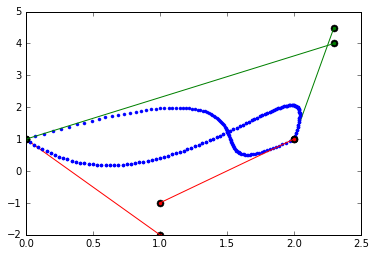

In [8]:
Pxs=[[0,1,2.3,2],[2,1,2.3,0]]
Pys=[[1,-2,4.5,1],[1,-1,4.0,1]]

Bxs=[]
Bys=[]

for k in range(len(Pxs)):
    Px=Pxs[k]
    Py=Pys[k]
    

    Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
    By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]
    Bxs.append(Bx)
    Bys.append(By)
    
    plt.plot(Bxs, Bys, 'b.')

    for i in range(len(Px)):
        plt.plot(Px[i],Py[i],'ko-',markersize=7)

    plt.plot(Px[0:2],Py[0:2],'r.-')
    plt.plot(Px[2::],Py[2::],'g.-')

# try with standard iris data set 

In [9]:
import seaborn as sns

In [10]:
df = sns.load_dataset("iris")

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
list(set(df.species))[0]

'setosa'

In [13]:
#df[df.species==list(set(df.species))[0]]

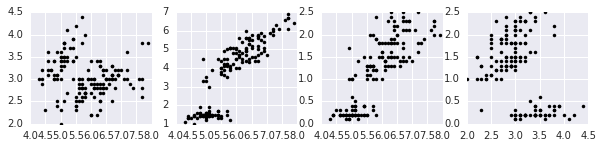

In [14]:
plt.figure(figsize=[10,2])
plt.subplot(1,4,1)
plt.plot(df.sepal_length,df.sepal_width,'k.')
plt.subplot(1,4,2)
plt.plot(df.sepal_length,df.petal_length,'k.')
plt.subplot(1,4,3)
plt.plot(df.sepal_length,df.petal_width,'k.')
plt.subplot(1,4,4)
plt.plot(df.sepal_width,df.petal_width,'k.')

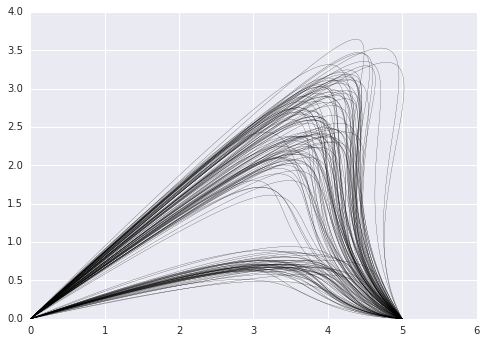

In [15]:
for k in range(len(df)):
    
    Px=[0.,df.sepal_length.values[k],df.sepal_width.values[k],5.]
    Py=[0.0,df.petal_length.values[k],df.petal_width.values[k],0.0]
    
    Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
    By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

    plt.plot(Bx, By, 'k-',linewidth=0.2)

In [37]:
df.sepal_length.values[0]

5.0999999999999996

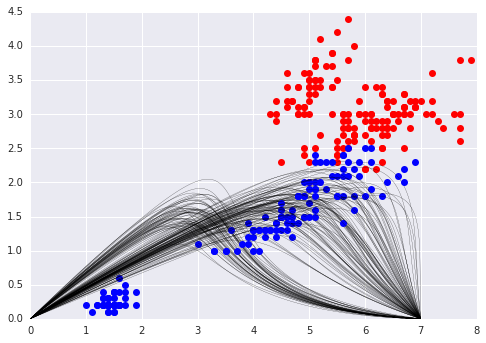

In [88]:
for k in range(len(df)):
    
    Px=[0.,df.sepal_length.values[k],df.petal_length.values[k],7.]
    Py=[0.0,df.sepal_width.values[k],df.petal_width.values[k],0.0]
    
    Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
    By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

    plt.plot(Bx, By, 'k-',linewidth=0.2)
    plt.plot(Px[1],Py[1],'ro')
    plt.plot(Px[2],Py[2],'bo')

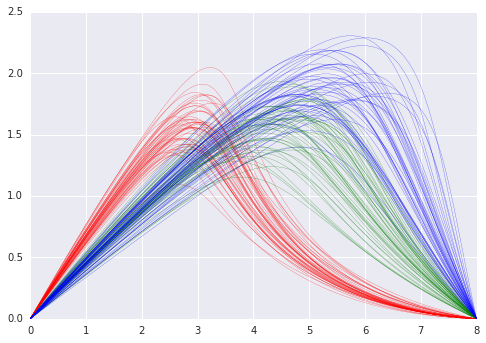

In [81]:
df[df.species==list(set(df.species))[0]]

for k in range(len(df)):
    
    Px=[0.,df.sepal_length.values[k],df.petal_length.values[k],8.]
    Py=[0.0,df.sepal_width.values[k],df.petal_width.values[k],0.0]
    
    Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
    By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]
    
    if df.species[k]==list(set(df.species))[0]:
        plt.plot(Bx, By, 'r-',linewidth=0.2)
    if df.species[k]==list(set(df.species))[1]:
        plt.plot(Bx, By, 'g-',linewidth=0.2)
    if df.species[k]==list(set(df.species))[2]:
        plt.plot(Bx, By, 'b-',linewidth=0.2)

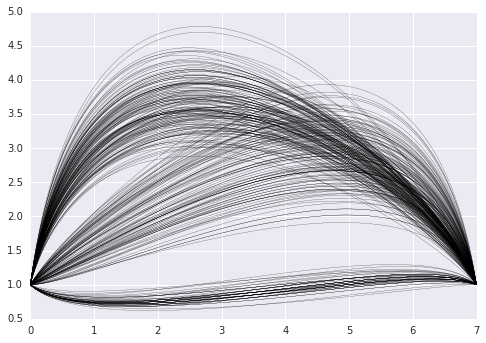

In [104]:
for j in range(len(df)):
    
    Pxs=[[0,1,6,7],[7,6,1,0]]
    Pys=[[1,df.sepal_length.values[j],df.sepal_width.values[j],1],[1,df.petal_length.values[j],df.petal_width.values[j],1]]

    for k in range(len(Pxs)):
        Px=Pxs[k]
        Py=Pys[k]


        Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
        By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

        plt.plot(Bx, By, 'k-',linewidth=0.2)

        #for i in range(len(Px)):
        #    plt.plot(Px[i],Py[i],'ko-',markersize=7)

        #plt.plot(Px[0:2],Py[0:2],'r.-')
        #plt.plot(Px[2::],Py[2::],'g.-')


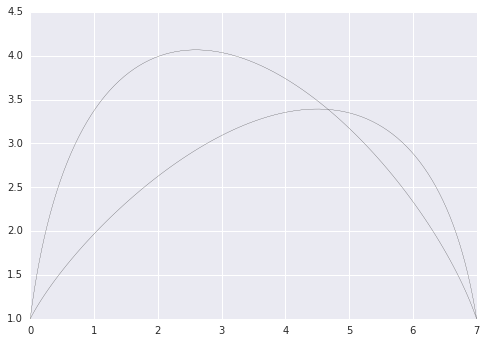

In [129]:
j=140
Pxs=[[0,1,6,7],[7,6,1,0]]
Pys=[[1,df.sepal_length.values[j],df.sepal_width.values[j],1],[1,df.petal_length.values[j],df.petal_width.values[j],1]]

for k in range(len(Pxs)):
    Px=Pxs[k]
    Py=Pys[k]


    Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
    By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

    plt.plot(Bx, By, 'k-',linewidth=0.2)

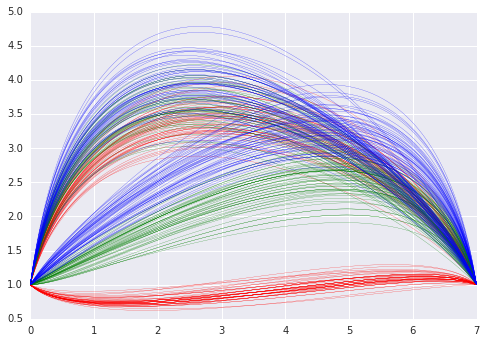

In [133]:
for j in range(len(df)):
    
    Pxs=[[0,1,6,7],[7,6,1,0]]
    Pys=[[1,df.sepal_length.values[j],df.sepal_width.values[j],1],[1,df.petal_length.values[j],df.petal_width.values[j],1]]

    for k in range(len(Pxs)):
        Px=Pxs[k]
        Py=Pys[k]


        Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
        By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

        #plt.plot(Bx, By, 'k-',linewidth=0.2)

        if df.species[j]==list(set(df.species))[0]:
            plt.plot(Bx, By, 'r-',linewidth=0.2)
        if df.species[j]==list(set(df.species))[1]:
            plt.plot(Bx, By, 'g-',linewidth=0.2)
        if df.species[j]==list(set(df.species))[2]:
            plt.plot(Bx, By, 'b-',linewidth=0.2)

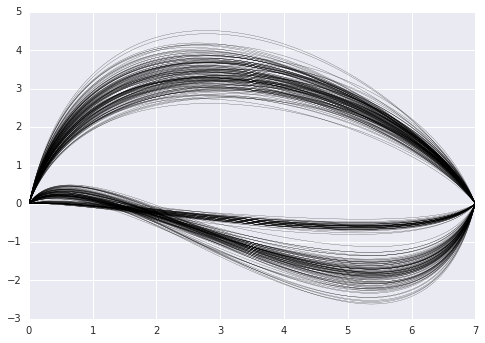

In [144]:
for j in range(len(df)):
    
    Pxs=[[0,1,6,7],[7,6,1,0]]
    Pys=[[0,df.sepal_length.values[j],df.sepal_width.values[j],0],[0,-df.petal_length.values[j],df.petal_width.values[j],0]]

    for k in range(len(Pxs)):
        Px=Pxs[k]
        Py=Pys[k]


        Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
        By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

        plt.plot(Bx, By, 'k-',linewidth=0.2)


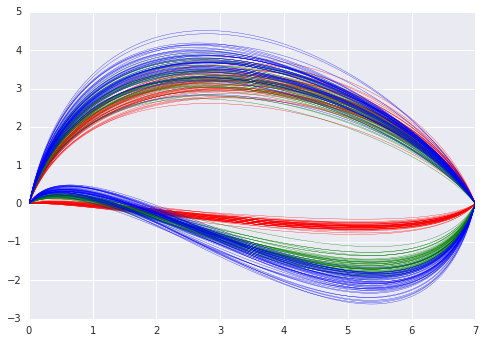

In [145]:
for j in range(len(df)):
    
    Pxs=[[0,1,6,7],[7,6,1,0]]
    Pys=[[0,df.sepal_length.values[j],df.sepal_width.values[j],0],[0,-df.petal_length.values[j],df.petal_width.values[j],0]]

    for k in range(len(Pxs)):
        Px=Pxs[k]
        Py=Pys[k]


        Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
        By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

        #plt.plot(Bx, By, 'k-',linewidth=0.2)

        if df.species[j]==list(set(df.species))[0]:
            plt.plot(Bx, By, 'r-',linewidth=0.3)
        if df.species[j]==list(set(df.species))[1]:
            plt.plot(Bx, By, 'g-',linewidth=0.3)
        if df.species[j]==list(set(df.species))[2]:
            plt.plot(Bx, By, 'b-',linewidth=0.3)

# similar to traditional parallel coordinates

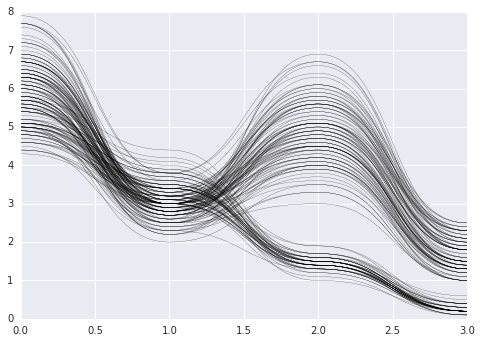

In [153]:
for j in range(len(df)):
    
    Pxs=[[0,.5,.5,1],[1,1.5,1.5,2],[2,2.5,2.5,3]]
    Pys=[[df.sepal_length.values[j],df.sepal_length.values[j],df.sepal_width.values[j],df.sepal_width.values[j]],
         [df.sepal_width.values[j],df.sepal_width.values[j],df.petal_length.values[j],df.petal_length.values[j]],
         [df.petal_length.values[j],df.petal_length.values[j],df.petal_width.values[j],df.petal_width.values[j]]]

    for k in range(len(Pxs)):
        Px=Pxs[k]
        Py=Pys[k]


        Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
        By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

        plt.plot(Bx, By, 'k-',linewidth=0.2)

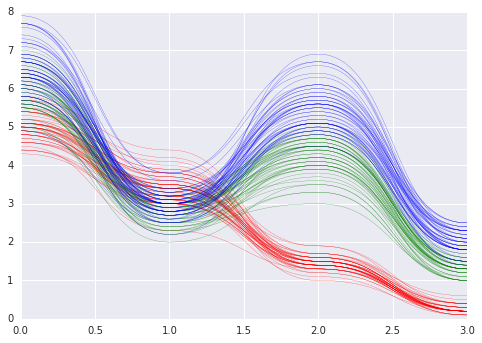

In [156]:
for j in range(len(df)):
    
    Pxs=[[0,.5,.5,1],[1,1.5,1.5,2],[2,2.5,2.5,3]]
    Pys=[[df.sepal_length.values[j],df.sepal_length.values[j],df.sepal_width.values[j],df.sepal_width.values[j]],
         [df.sepal_width.values[j],df.sepal_width.values[j],df.petal_length.values[j],df.petal_length.values[j]],
         [df.petal_length.values[j],df.petal_length.values[j],df.petal_width.values[j],df.petal_width.values[j]]]

    for k in range(len(Pxs)):
        Px=Pxs[k]
        Py=Pys[k]


        Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
        By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]

        #plt.plot(Bx, By, 'k-',linewidth=0.2)

        if df.species[j]==list(set(df.species))[0]:
            plt.plot(Bx, By, 'r-',linewidth=0.2)
        if df.species[j]==list(set(df.species))[1]:
            plt.plot(Bx, By, 'g-',linewidth=0.2)
        if df.species[j]==list(set(df.species))[2]:
            plt.plot(Bx, By, 'b-',linewidth=0.2)

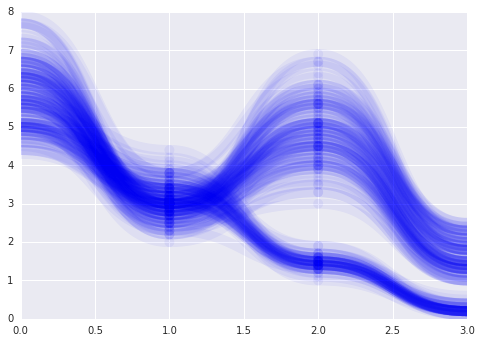

In [38]:
Bxs=[]
Bys=[]

for j in range(len(df)):
    
    Pxs=[[0,.5,.5,1],[1,1.5,1.5,2],[2,2.5,2.5,3]]
    Pys=[[df.sepal_length.values[j],df.sepal_length.values[j],df.sepal_width.values[j],df.sepal_width.values[j]],
         [df.sepal_width.values[j],df.sepal_width.values[j],df.petal_length.values[j],df.petal_length.values[j]],
         [df.petal_length.values[j],df.petal_length.values[j],df.petal_width.values[j],df.petal_width.values[j]]]

    for k in range(len(Pxs)):
        Px=Pxs[k]
        Py=Pys[k]


        Bx = (1-t)**3*Px[0] + 3*(1-t)**2*t*Px[1] + 3*(1-t)*t**2*Px[2] + t**3*Px[3]
        By = (1-t)**3*Py[0] + 3*(1-t)**2*t*Py[1] + 3*(1-t)*t**2*Py[2] + t**3*Py[3]
        Bxs.append(Bx)
        Bys.append(By)
    
        plt.plot(Bx, By, 'b-',linewidth=10,alpha=0.05)

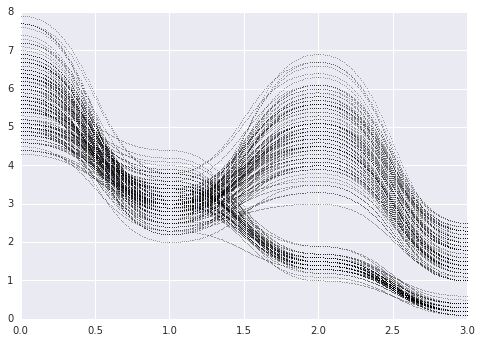

In [31]:
plt.plot(reshape(Bxs,shape(Bxs)[0]*shape(Bxs)[1],1),reshape(Bys,shape(Bys)[0]*shape(Bys)[1],1),'k.',markersize=1)

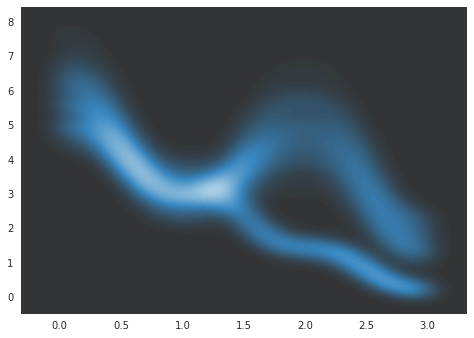

In [32]:
sns.kdeplot(reshape(Bxs,shape(Bxs)[0]*shape(Bxs)[1],1),reshape(Bys,shape(Bys)[0]*shape(Bys)[1],1),
            n_levels=50, cmap='Blues_d', shade=True)